In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

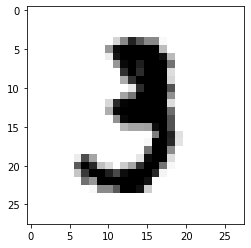

3


In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[10], cmap = plt.cm.binary)
plt.show()
print(y_train[10])
# завантаження мніста, x_train[10]/y_train[10] - замінивши 10 на інше число 
# отримаємо зображення іншої цифри (від 0 до 9).
# x_train/x_test - зображення,  y_train/y_test "назви" 

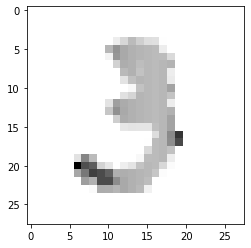

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
# нормалізація зображення (значення [0-255] --> [0-1]) 
plt.imshow(x_train[10], cmap = plt.cm.binary)
plt.show()
#print(x_train[10]) 

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, tf.nn.relu))
model.add(tf.keras.layers.Dense(128, tf.nn.relu))
model.add(tf.keras.layers.Dense(10, tf.nn.softmax))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics =['accuracy']
              )

In [0]:
model.summary() # Модель мережі

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2310 - accuracy: 0.9323
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0592 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9897


In [0]:
def plot_graphs(history, metric): # функція для графіків наведених внизу
  plt.plot(history.history[metric])
  #plt.plot(history.history['var_'+ metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, metric])
  plt.show()

In [0]:
loss, acc = model.evaluate(x_test,y_test) # Інформація про точність

313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9777


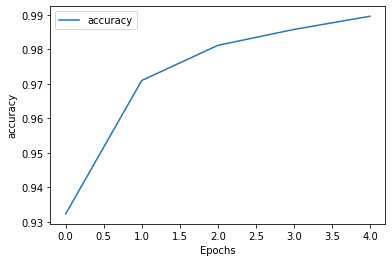

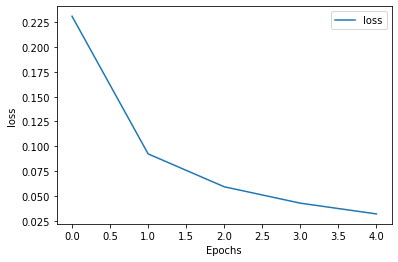

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
pred = model.predict(x_test)

So it is:     0


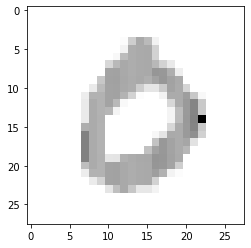

In [0]:
# Результат... x_res вільно можна змінювати 
x_res = 11
print ("So it is: {:5.0f}".format(np.argmax(pred[x_res])) )
plt.imshow(x_test[x_res], cmap = plt.cm.binary)
plt.show()